<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/19_Feb_24_FV_DL_DEMO_With_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ref] https://www.geeksforgeeks.org/music-genre-classifier-using-machine-learning/

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่


import pandas as pd

df_mean = pd.read_csv('./df_mean_splited.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

df_var = pd.read_csv('./df_var_splited.csv')
df_var = df_var.drop(columns=['Unnamed: 0'])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/song


In [ ]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-312.002991,101.441200,-45.043922,19.556147,-4.002711,25.125444,-12.163026,6.906718,-11.586530,-7.614164,...,-4.237078,3.298138,-1.751302,2093.072028,2926.912418,0.041845,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
1,-305.049774,105.443916,-46.023987,17.922361,-13.973338,23.583933,-15.183883,5.439202,-13.734568,-11.125467,...,-3.501495,1.987618,-2.141070,2073.836632,2832.354328,0.042033,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
2,-311.700623,72.263252,-63.784790,21.794674,-13.880082,32.025867,-5.895024,10.517797,-10.559294,-1.611562,...,-4.383029,1.924374,0.213685,2980.200582,3197.992963,0.076791,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
3,-362.134674,104.500938,-33.407307,17.736410,-1.782775,19.366240,-3.317033,2.735603,-11.206043,-7.780622,...,-1.235082,1.928368,-3.210941,1788.219618,2518.429843,0.038724,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
4,-327.335449,83.328346,-52.564529,20.710361,-11.569252,32.434975,-17.252556,9.790280,-13.552838,-4.453683,...,-3.211643,3.730990,-2.912611,2539.653156,3252.498679,0.055516,113.581731,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train


In [ ]:
df_var.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,4275.583984,805.659607,524.216064,428.165741,270.349396,160.515198,161.883362,134.415359,140.451874,141.683929,...,61.285183,66.693871,57.184452,8.852737e+05,657104.770360,0.000869,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
1,4198.060547,623.343262,850.148499,371.768677,335.148956,264.430969,162.590912,156.512039,144.904877,163.349411,...,70.805672,66.077049,61.975136,8.415808e+05,556945.310105,0.000950,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
2,6255.282715,1046.415771,842.253845,450.718445,385.070923,327.791595,245.153946,153.240143,144.789597,145.529221,...,70.541389,63.405022,67.011726,2.104529e+06,706740.613776,0.004567,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
3,4197.904297,674.049072,801.130798,556.491150,385.469238,233.962021,251.144867,179.654266,152.669357,166.874222,...,81.620811,87.288498,76.549385,1.183589e+06,556014.997841,0.001922,91.468473,0,/content/gdrive/MyDrive/song/nontherapy/SnapSa...,test
4,7294.022461,1365.812256,763.566284,526.887390,392.473206,235.004105,172.632553,134.790024,119.642456,101.102592,...,60.833050,61.139202,52.264553,1.256965e+06,749983.856764,0.001795,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train


# 📌ANN model With Out Balance Class 🚫

## Var fv

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']

# Balance class/ class ละ 65 sample โดยการสุ่ม class = 1 ให่มีจำนวนเท่ากับ class = 0

# ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')


X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# ก่อน Balance class
class 0 :65
class 1 :28


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
3/3 [==============================] - 2s 150ms/step - loss: 0.9484 - accuracy: 0.5161 - val_loss: 7.8623 - val_accuracy: 0.7083
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6470 - accuracy: 0.6989 - val_loss: 6.7548 - val_accuracy: 0.7083
Epoch 3/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.5420 - accuracy: 0.7204 - val_loss: 5.6861 - val_accuracy: 0.7083
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.5147 - accuracy: 0.7957 - val_loss: 4.4280 - val_accuracy: 0.7083
Epoch 5/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5445 - accuracy: 0.6989 - val_loss: 4.0353 - val_accuracy: 0.7083
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5001 - accuracy: 0.7634 - val_loss: 3.8054 - val_accuracy: 0.7083
Epoch 7/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.4667 - accuracy: 0.8065 - val_loss: 3.3580 - val_accuracy: 0.7083
Epoch 8/1000

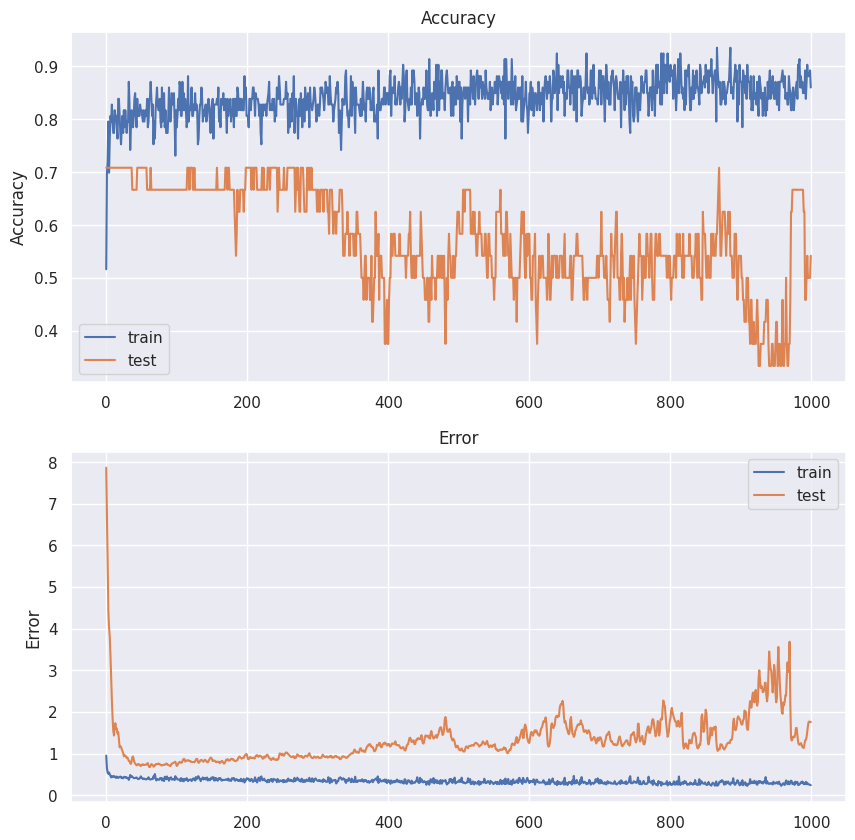

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 167ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        17
           1       0.39      1.00      0.56         7

    accuracy                           0.54        24
   macro avg       0.69      0.68      0.54        24
weighted avg       0.82      0.54      0.53        24

[[ 6 11]
 [ 0  7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

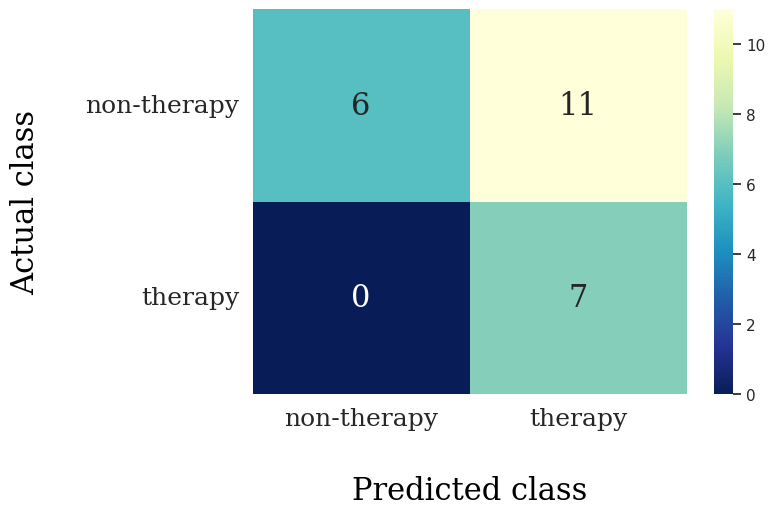

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 24)                0         
                                                                 
 dense_15 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train_norm, y_train,
                 validation_data = (X_test_norm,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
3/3 [==============================] - 2s 133ms/step - loss: 0.6404 - accuracy: 0.6344 - val_loss: 0.6554 - val_accuracy: 0.7083
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5973 - accuracy: 0.7097 - val_loss: 0.6347 - val_accuracy: 0.7083
Epoch 3/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.5679 - accuracy: 0.6774 - val_loss: 0.6166 - val_accuracy: 0.7083
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.5480 - accuracy: 0.7312 - val_loss: 0.6039 - val_accuracy: 0.7083
Epoch 5/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.5416 - accuracy: 0.7742 - val_loss: 0.5970 - val_accuracy: 0.7083
Epoch 6/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.5267 - accuracy: 0.7419 - val_loss: 0.5957 - val_accuracy: 0.7083
Epoch 7/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.5205 - accuracy: 0.8387 - val_loss: 0.5994 - val_accuracy: 0.7083
Epoch 8/1000

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test_norm)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 182ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24

[[17  0]
 [ 7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

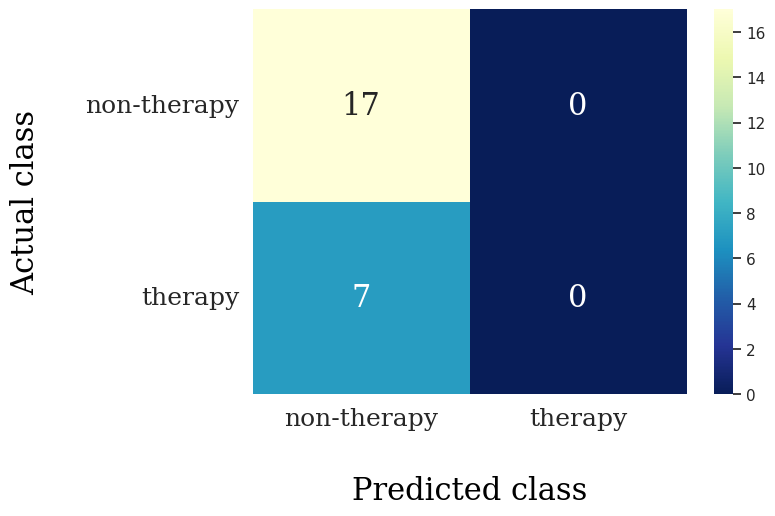

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [ ]:
train = df_mean[df_mean['split'] =='train']
test = df_mean[df_mean['split'] !='train']

# Balance class/ class ละ 65 sample โดยการสุ่ม class = 1 ให่มีจำนวนเท่ากับ class = 0

# ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# ก่อน Balance class
class 0 :65
class 1 :28


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 24)                0         
                                                                 
 dense_18 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
3/3 [==============================] - 2s 180ms/step - loss: 0.7673 - accuracy: 0.6667 - val_loss: 12.5142 - val_accuracy: 0.7083
Epoch 2/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.5648 - accuracy: 0.7527 - val_loss: 10.4187 - val_accuracy: 0.7083
Epoch 3/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.5278 - accuracy: 0.7634 - val_loss: 8.3016 - val_accuracy: 0.7083
Epoch 4/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.5705 - accuracy: 0.7204 - val_loss: 6.5077 - val_accuracy: 0.7083
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.5053 - accuracy: 0.7634 - val_loss: 5.1601 - val_accuracy: 0.7083
Epoch 6/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.4930 - accuracy: 0.7742 - val_loss: 3.6342 - val_accuracy: 0.7083
Epoch 7/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4192 - accuracy: 0.8065 - val_loss: 2.2864 - val_accuracy: 0.7083
Epoch 8/10

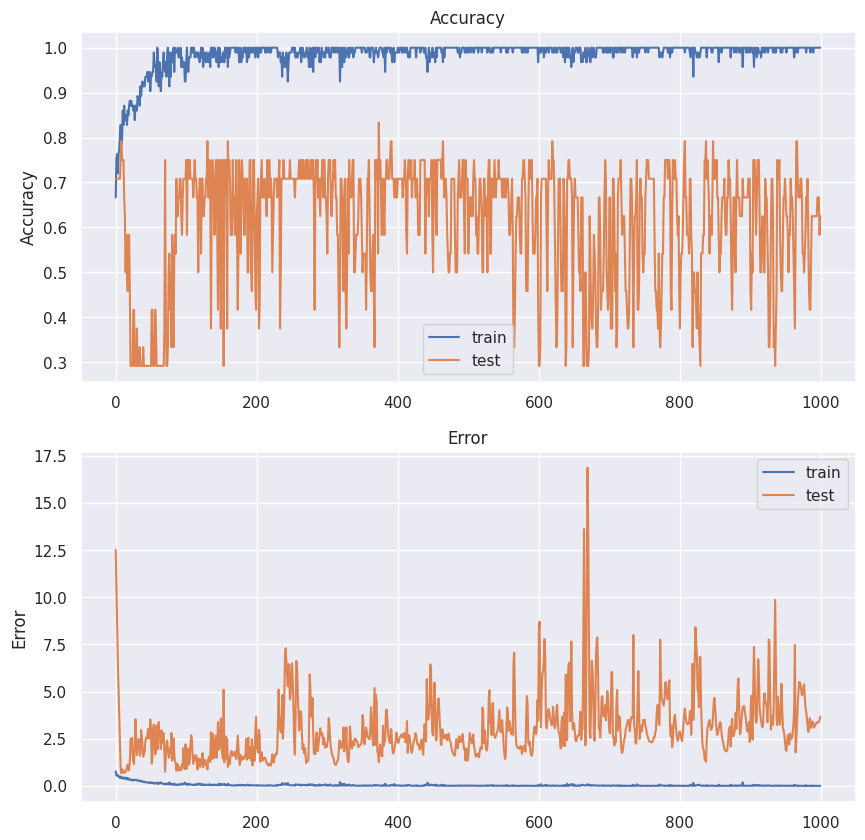

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 89ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.33      0.29      0.31         7

    accuracy                           0.62        24
   macro avg       0.53      0.53      0.53        24
weighted avg       0.61      0.62      0.62        24

[[13  4]
 [ 5  2]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

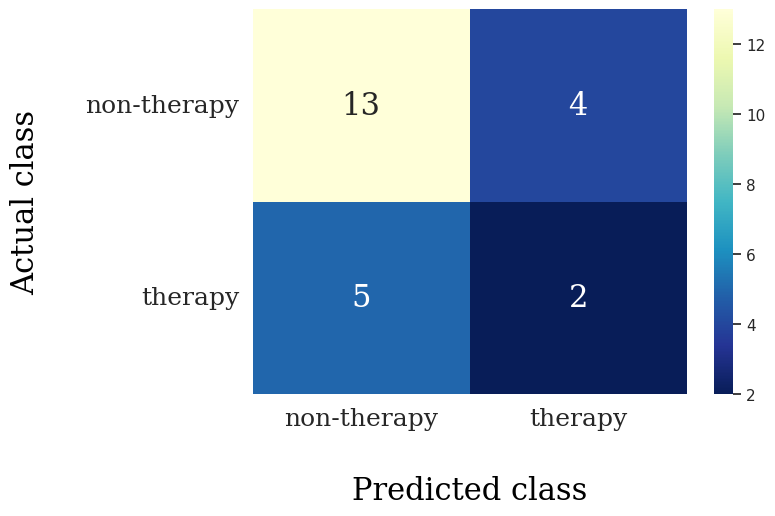

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 24)                0         
                                                                 
 dense_21 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train_norm, y_train,
                 validation_data = (X_test_norm,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
3/3 [==============================] - 1s 124ms/step - loss: 0.6837 - accuracy: 0.6344 - val_loss: 0.6635 - val_accuracy: 0.7083
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6522 - accuracy: 0.6559 - val_loss: 0.6427 - val_accuracy: 0.7083
Epoch 3/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6295 - accuracy: 0.7097 - val_loss: 0.6231 - val_accuracy: 0.7083
Epoch 4/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6073 - accuracy: 0.6989 - val_loss: 0.6088 - val_accuracy: 0.7083
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5889 - accuracy: 0.7204 - val_loss: 0.6008 - val_accuracy: 0.7083
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5711 - accuracy: 0.7312 - val_loss: 0.6019 - val_accuracy: 0.7083
Epoch 7/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.5659 - accuracy: 0.7312 - val_loss: 0.6109 - val_accuracy: 0.7083
Epoch 8/1000

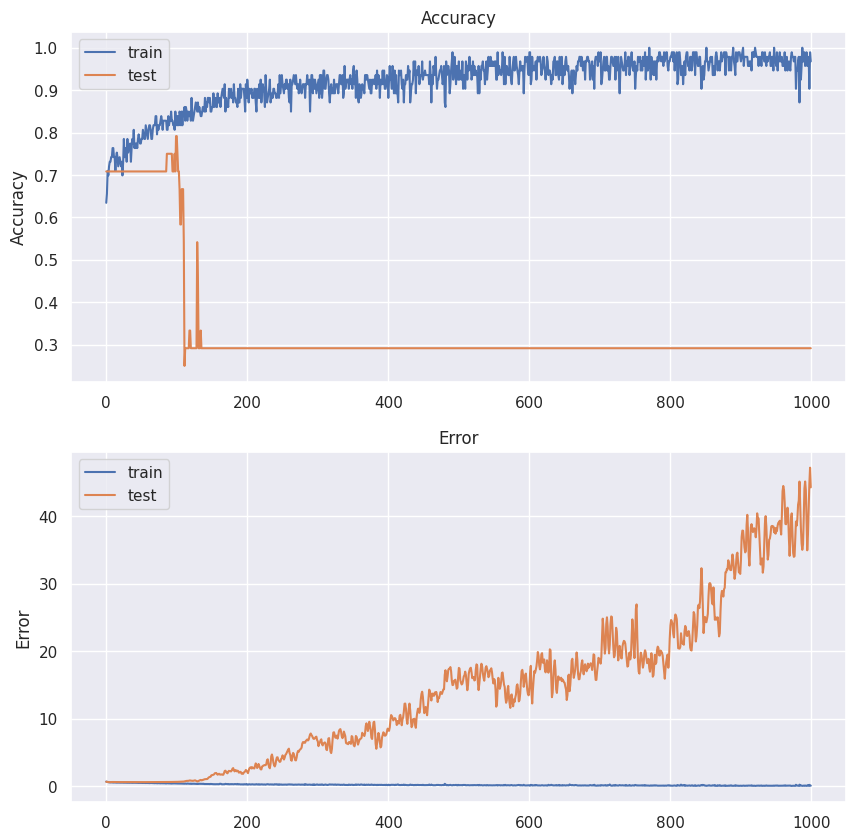

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test_norm)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 129ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.45         7

    accuracy                           0.29        24
   macro avg       0.15      0.50      0.23        24
weighted avg       0.09      0.29      0.13        24

[[ 0 17]
 [ 0  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

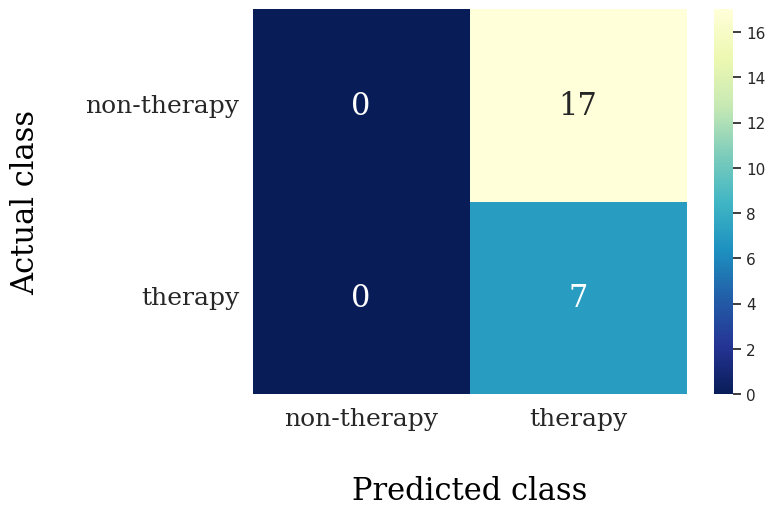

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 📌ANN model With Balance Class ✅


## Var fv

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']

# Balance class/ class ละ 65 sample โดยการสุ่ม class = 1 ให่มีจำนวนเท่ากับ class = 0

# ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# หลัง Balance class
train_y_1 = train_y_1.sample(n = len(train_y_0), replace=True)
print(f'# หลัง Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# รวมตารางอีกครั้ง ก่อนแยก X,y
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# ก่อน Balance class
class 0 :65
class 1 :28
# หลัง Balance class
class 0 :65
class 1 :65


<ipython-input-4-756e0e5b4179>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


In [ ]:
# !pip install librosa
# !pip install numpy
# !pip install scipy
# !pip install sklearn
# !pip install keras

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                        

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
5/5 [==============================] - 5s 385ms/step - loss: 0.6390 - accuracy: 0.6308 - val_loss: 65.8066 - val_accuracy: 0.6667
Epoch 2/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.5971 - accuracy: 0.7154 - val_loss: 66.0521 - val_accuracy: 0.6667
Epoch 3/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.5761 - accuracy: 0.7231 - val_loss: 68.4784 - val_accuracy: 0.6667
Epoch 4/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.4925 - accuracy: 0.8000 - val_loss: 66.0229 - val_accuracy: 0.6667
Epoch 5/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.5261 - accuracy: 0.7462 - val_loss: 61.0182 - val_accuracy: 0.6667
Epoch 6/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.5289 - accuracy: 0.7923 - val_loss: 65.2110 - val_accuracy: 0.6667
Epoch 7/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.5033 - accuracy: 0.8077 - val_loss: 63.6842 - val_accuracy: 0.6667
Epoch

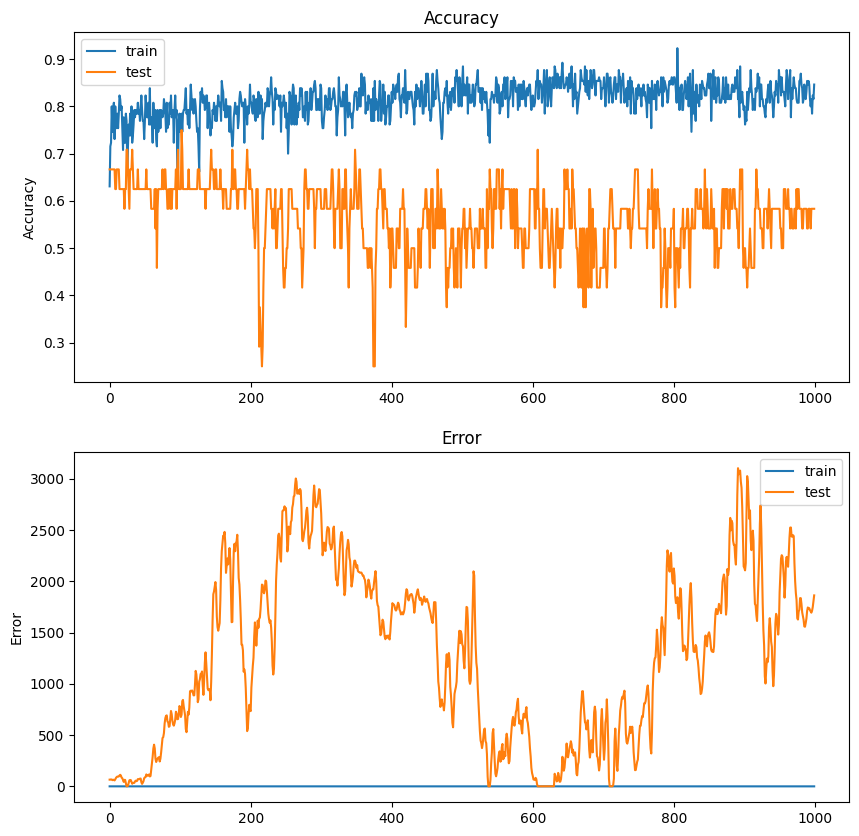

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
test_error, test_accuracy = ann.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 27ms/step - loss: 1862.5035 - accuracy: 0.5833
Test accuracy: 0.5833333134651184


In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 153ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.33      0.43      0.38         7

    accuracy                           0.58        24
   macro avg       0.53      0.54      0.53        24
weighted avg       0.62      0.58      0.60        24

[[11  6]
 [ 4  3]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

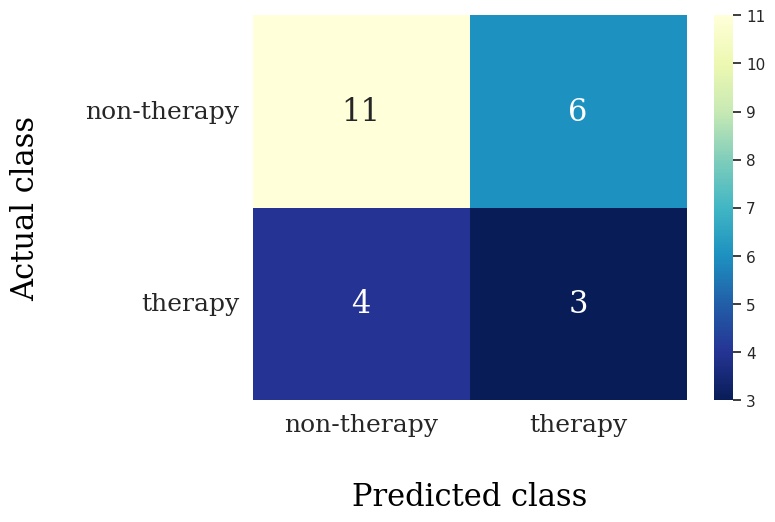

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               6400      
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train_norm, y_train,
                 validation_data = (X_test_norm,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
5/5 [==============================] - 1s 69ms/step - loss: 0.6714 - accuracy: 0.6154 - val_loss: 0.6655 - val_accuracy: 0.7083
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.6218 - accuracy: 0.6615 - val_loss: 0.6630 - val_accuracy: 0.7083
Epoch 3/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.6140 - accuracy: 0.6385 - val_loss: 0.6642 - val_accuracy: 0.7083
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5959 - accuracy: 0.6615 - val_loss: 0.6576 - val_accuracy: 0.7083
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5838 - accuracy: 0.6615 - val_loss: 0.6590 - val_accuracy: 0.6667
Epoch 6/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5853 - accuracy: 0.6923 - val_loss: 0.6629 - val_accuracy: 0.6667
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.5829 - accuracy: 0.6923 - val_loss: 0.6670 - val_accuracy: 0.6667
Epoch 8/1000


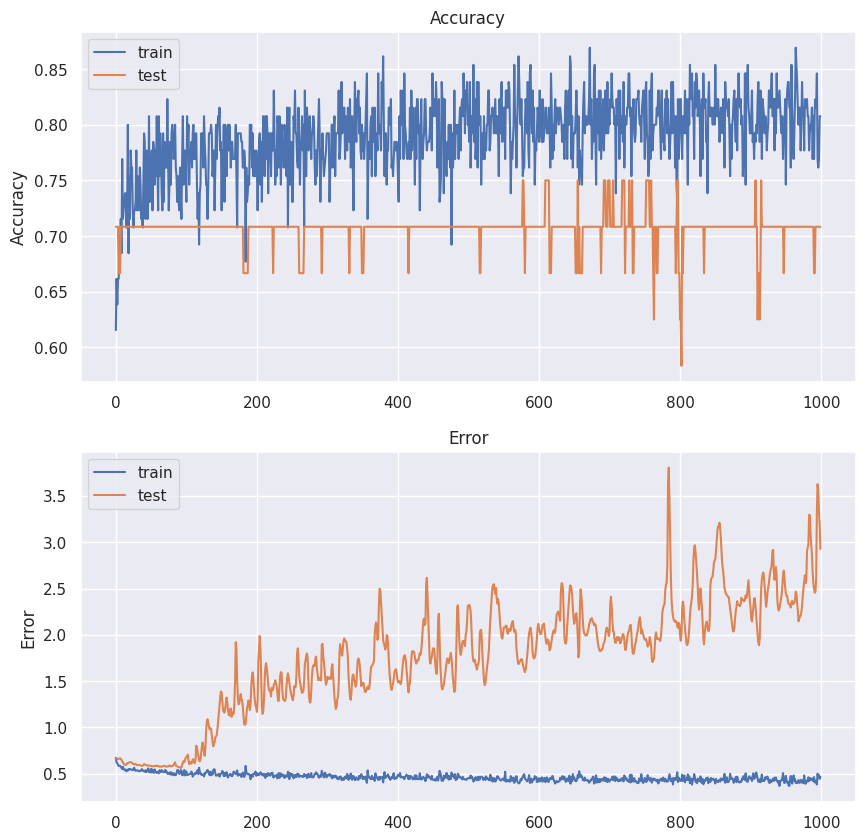

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test_norm)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 88ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24

[[17  0]
 [ 7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

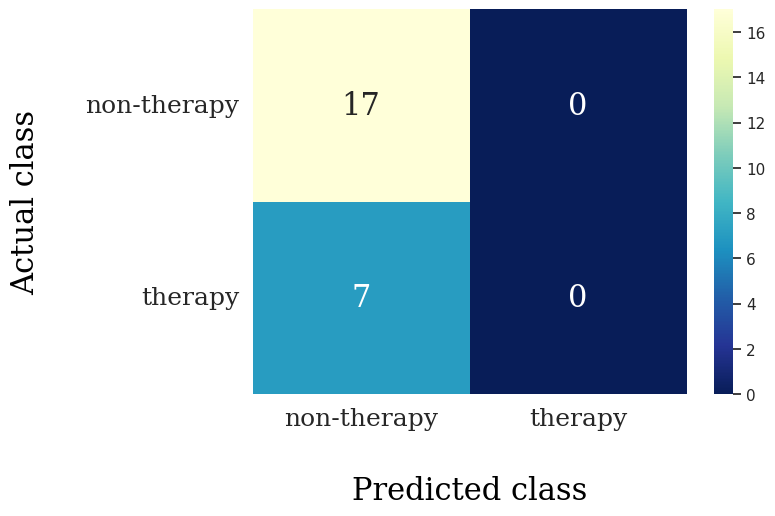

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [ ]:
train = df_mean[df_mean['split'] =='train']
test = df_mean[df_mean['split'] !='train']

# Balance class/ class ละ 65 sample โดยการสุ่ม class = 1 ให่มีจำนวนเท่ากับ class = 0

# ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# หลัง Balance class
train_y_1 = train_y_1.sample(n = len(train_y_0), replace=True)
print(f'# หลัง Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# รวมตารางอีกครั้ง ก่อนแยก X,y
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# ก่อน Balance class
class 0 :65
class 1 :28
# หลัง Balance class
class 0 :65
class 1 :65


<ipython-input-58-14c0dde2b9fe>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 256)               6400      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
5/5 [==============================] - 2s 91ms/step - loss: 0.7445 - accuracy: 0.5615 - val_loss: 9.1395 - val_accuracy: 0.7083
Epoch 2/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.6132 - accuracy: 0.7154 - val_loss: 4.3632 - val_accuracy: 0.7083
Epoch 3/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.6482 - accuracy: 0.6154 - val_loss: 1.1126 - val_accuracy: 0.7083
Epoch 4/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.6098 - accuracy: 0.6462 - val_loss: 1.1903 - val_accuracy: 0.7083
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.6231 - accuracy: 0.6846 - val_loss: 0.8914 - val_accuracy: 0.7500
Epoch 6/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.5762 - accuracy: 0.7385 - val_loss: 3.2800 - val_accuracy: 0.2917
Epoch 7/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.5973 - accuracy: 0.6615 - val_loss: 6.9613 - val_accuracy: 0.2917
Epoch 8/1000


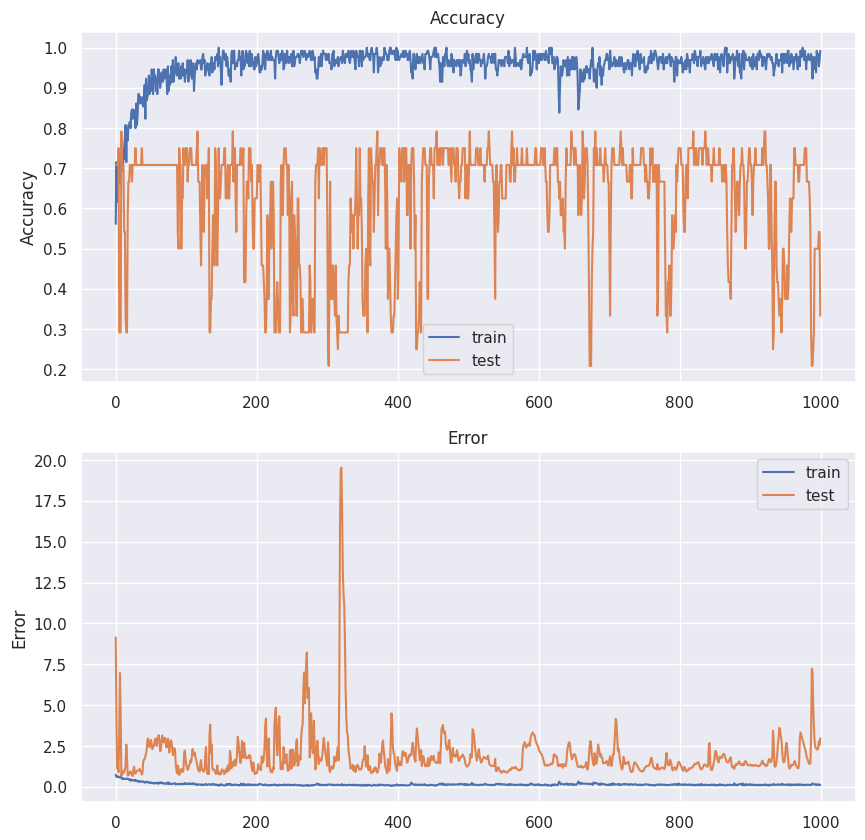

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 139ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.57      0.24      0.33        17
           1       0.24      0.57      0.33         7

    accuracy                           0.33        24
   macro avg       0.40      0.40      0.33        24
weighted avg       0.47      0.33      0.33        24

[[ 4 13]
 [ 3  4]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

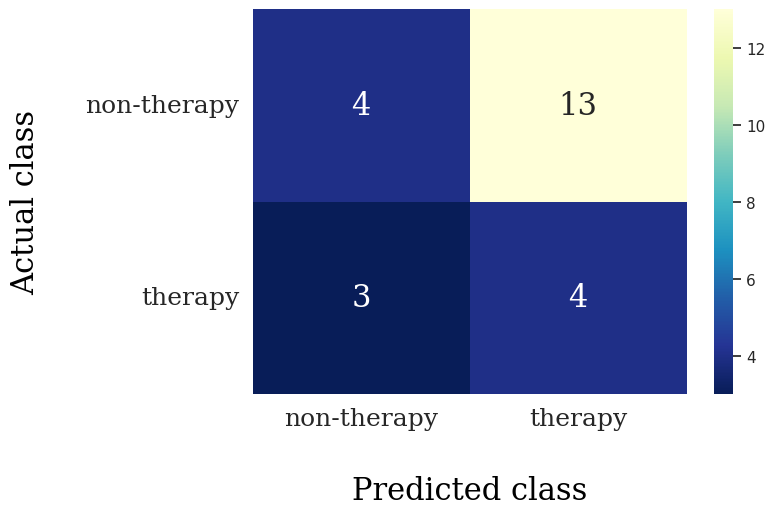

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import numpy as np

ann = Sequential()

ann.add(Flatten(input_shape=(24,)))
ann.add(Dense(256, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation='softmax'))
ann.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 24)                0         
                                                                 
 dense_24 (Dense)            (None, 256)               6400      
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
ann.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = ann.fit(X_train_norm, y_train,
                 validation_data = (X_test_norm,y_test),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
5/5 [==============================] - 1s 64ms/step - loss: 0.6904 - accuracy: 0.5385 - val_loss: 0.6706 - val_accuracy: 0.7083
Epoch 2/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6626 - accuracy: 0.6692 - val_loss: 0.6559 - val_accuracy: 0.7083
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6544 - accuracy: 0.6385 - val_loss: 0.6440 - val_accuracy: 0.7083
Epoch 4/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.6359 - accuracy: 0.6538 - val_loss: 0.6409 - val_accuracy: 0.7083
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6324 - accuracy: 0.6538 - val_loss: 0.6355 - val_accuracy: 0.7083
Epoch 6/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6324 - accuracy: 0.6846 - val_loss: 0.6387 - val_accuracy: 0.7083
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.6453 - accuracy: 0.6538 - val_loss: 0.6450 - val_accuracy: 0.7083
Epoch 8/1000


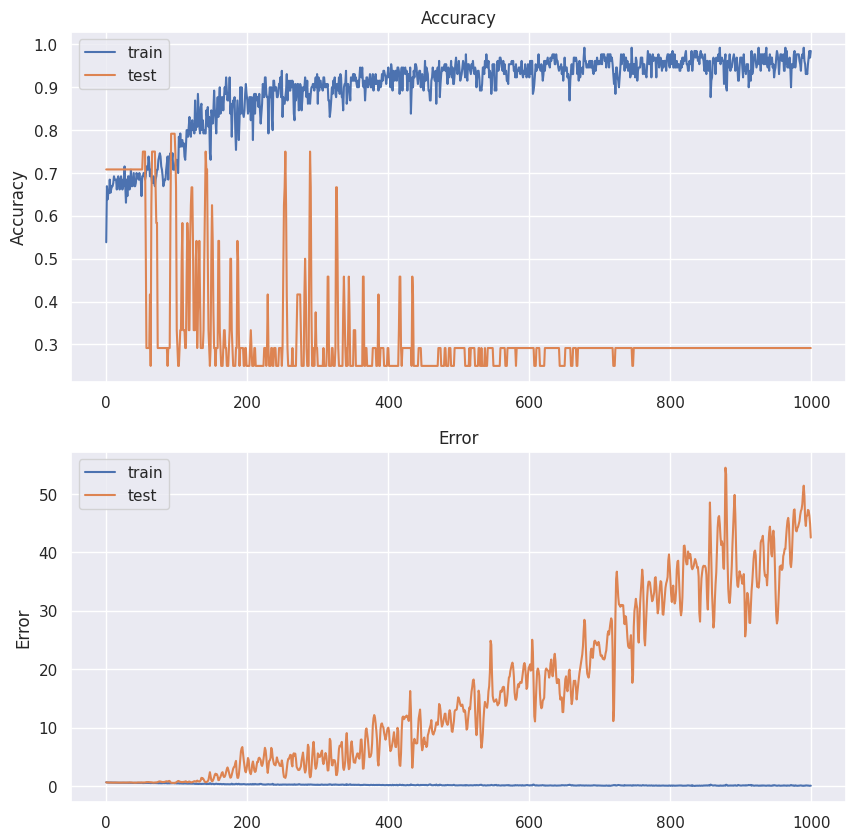

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

In [ ]:
# Predict
labels = [0,1]
predict = ann.predict(X_test_norm)

y_pred = list()
prob_list = list()
for i in range(0,len(predict)):
  result = np.argmax(predict[i])
  y_pred.append(labels[result])
  prob_list.append(predict[result])

1/1 [==============================] - 0s 80ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.45         7

    accuracy                           0.29        24
   macro avg       0.15      0.50      0.23        24
weighted avg       0.09      0.29      0.13        24

[[ 0 17]
 [ 0  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

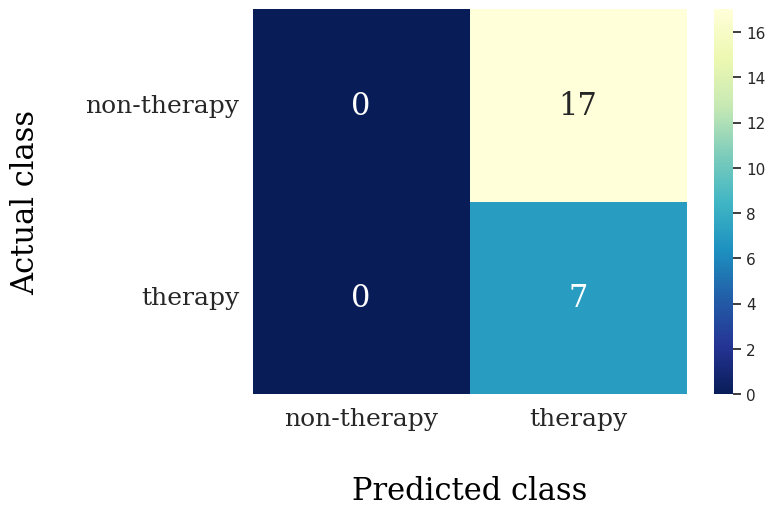

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)